# Datacheck for OpSim 

## About

Inspect input data meant for the Simulator object. The "orbitals" data is stored and read in the HDF5 format and includes time axis in MJD, as well as the sun (alt, az) and the satellites.

In [1]:
# Jupyter magic for autoreload:
%reload_ext autoreload
%autoreload 2
# Standard imports and utility ---
import sys
import h5py
import yaml
import numpy as np
import matplotlib.pyplot as plt
from   dateutil     import parser

# astro imports
from   astropy.time import Time

# Core lusee software
import lusee

### Simple helper for plotting:
def fin(plots):
    for p in plots:
        p.grid(True)
        _ = p.legend()

# Master verbosity:
chatty = False

if chatty:
    print("---------------------------------- PATH ----------------------------------------")
    for path_part in sys.path:
        if path_part!='': print(f'''{path_part}''')


In [14]:
# Local imports
from   nav import * # Astro/observation wrapper classes

if chatty:
    print('--------------------------------- VERSIONS -------------------------------------')
    print(f'''simpy: {simpy.__version__}, lusee: {lusee.__version__}, sim: {sim.__version__}''')

In [16]:
prefab_file = "../data/orbitals/20260110-20270115.hdf5"
f = h5py.File(prefab_file, "r")

ds_meta = f["/meta/configuration"] # Expect YAML payload
conf    = yaml.safe_load(ds_meta[0,])
metadata= yaml.dump(conf)

prd = conf['period'] # we use the dateutil parser to convert from text to datetime
t_start = Time(val=parser.parse(prd['start']),  format='datetime')
t_end   = Time(val=parser.parse(prd['end']),    format='datetime')

### -- Now on to the payload, the "orbitals"
ds_data = f["/data/orbitals"]
da = np.array(ds_data[:]) # data array

if chatty:
    print('-----------------------------------------------')
    print(f'''*** Metadata in the file {prefab_file} ***''')
    print('-----------------------------------------------')
    print(metadata)

    print('------------------------- TIME ENDPOINTS -----------------------------------')
    print(t_start.mjd, t_end.mjd)
    print('----------------------------------------------------------------------------')

    print(f'''Shape of the data payload: {da.shape}''')
    print('-----------------------------------------------')
    print(f'''*** Data payload in the file {prefab_file} ***''')
    print('-----------------------------------------------')
    print(f'''Shape of the data payload: {da.shape}''')

    # Print slices if necessary: # print(data_array[0:3,1:2]) # print(data_array[:,1:2])
    print(da[0:3,:])

In [17]:
mySun = Sun(da[:,0], da[:,1] , da[:,2])
mySat = Sat(da[:,0], da[:,3] , da[:,4])

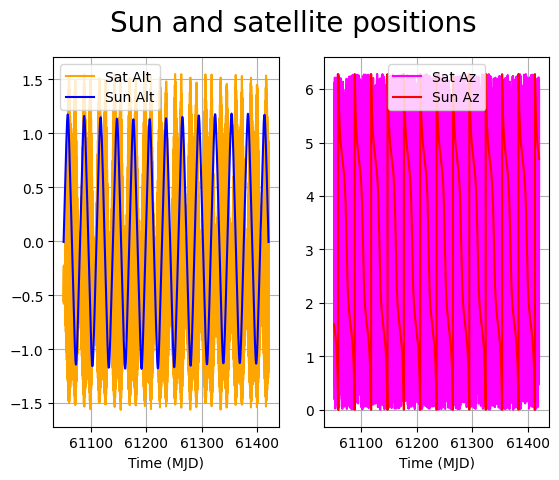

In [5]:
fig, (p1, p2) = plt.subplots(1,2)
fig.suptitle('Sun and satellite positions', fontsize=20)
plt.rcParams["figure.figsize"] = [20., 8.]
plt.rcParams["figure.autolayout"] = True

p1.set_xlabel('Time (MJD)')
p2.set_xlabel('Time (MJD)')

p1.plot(mySat.mjd, mySat.alt,  color="orange", label="Sat Alt")
p1.plot(mySun.mjd, mySun.alt,  color="blue",   label="Sun Alt")

p2.plot(mySat.mjd, mySat.az, color="magenta",label="Sat Az")
p2.plot(mySun.mjd, mySun.az, color="red",    label="Sun Az")

fin((p1, p2))

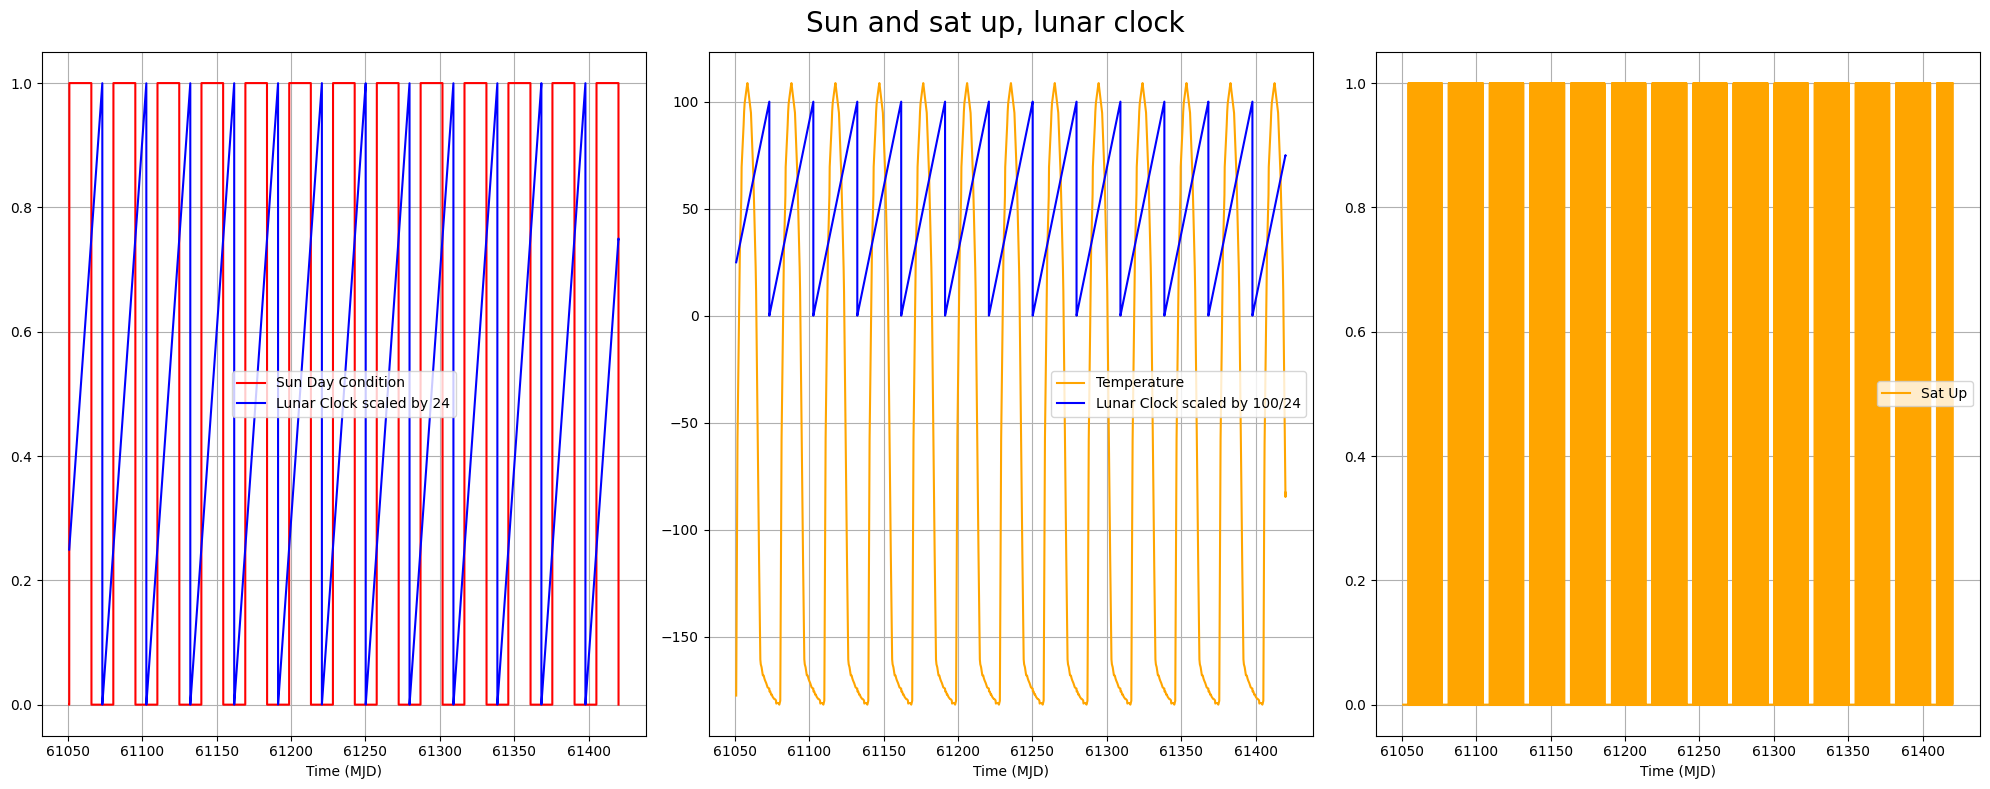

In [20]:
fig, (p1, p2, p3) = plt.subplots(1,3)
fig.suptitle('Sun and sat up, lunar clock', fontsize=20)
plt.rcParams["figure.figsize"] = [20., 8.]
plt.rcParams["figure.autolayout"] = True


p1.set_xlabel('Time (MJD)')
p2.set_xlabel('Time (MJD)')
p3.set_xlabel('Time (MJD)')

a = mySun.clocks

p1.plot(mySun.mjd, mySun.day, color="red",    label="Sun Day Condition")
p1.plot(mySun.mjd, a/24.0,    color="blue",   label="Lunar Clock scaled by 24")

p2.plot(mySat.mjd, mySun.temperature,         color="orange", label="Temperature")
p2.plot(mySun.mjd, 100.*a/24.0, color="blue",   label="Lunar Clock scaled by 100/24")

p3.plot(mySat.mjd, mySat.up,  color="orange", label="Sat Up")

fin((p1, p2, p3))

# print(a[-5])

In [7]:
print(len(mySun.mjd))
print(mySun.mjd_crossings)

35450
[61050.86868598 61065.72353186 61080.49759565 61095.28871127
 61110.10607484 61124.82090342 61139.67409097 61154.32213673
 61169.1932571  61183.80113901 61198.66735677 61213.27043242
 61228.11036194 61242.7439387  61257.54323774 61272.23481418
 61286.98992545 61301.75292538 61316.47239967 61331.30199762
 61346.00497064 61360.87760738 61375.58913827 61390.46755808
 61405.21145806 61420.05570304]


In [8]:
# Test the clock.

print(mySun.mjd[0], mySun.mjd[-1])
print(mySun.clock(61074.0))
print(mySun.mjd_crossings)


61050.833333333336 61420.09375
0.7224305428626678
[61050.86868598 61065.72353186 61080.49759565 61095.28871127
 61110.10607484 61124.82090342 61139.67409097 61154.32213673
 61169.1932571  61183.80113901 61198.66735677 61213.27043242
 61228.11036194 61242.7439387  61257.54323774 61272.23481418
 61286.98992545 61301.75292538 61316.47239967 61331.30199762
 61346.00497064 61360.87760738 61375.58913827 61390.46755808
 61405.21145806 61420.05570304]
